# Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import describe, fe

%reload_ext autoreload

# Load dataset

In [3]:
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
        "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", 
        "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
        "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
        "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", 
        "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
        "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

df = pd.read_csv(f"E:/gitlab/machine-learning/dataset/kddcup.data.corrected", sep=",", names=columns, index_col=None)

# head vs tail

In [9]:
describe.sample_data(df[["duration", "protocol_type", "service", "flag"]],n=10)

,duration,protocol_type,service,flag,,duration,protocol_type,service,flag
0,0,tcp,http,SF,< head | tail >,0,tcp,http,SF
1,0,tcp,http,SF,< head | tail >,0,tcp,http,SF
2,0,tcp,http,SF,< head | tail >,0,tcp,http,SF
3,0,tcp,http,SF,< head | tail >,0,tcp,http,SF
4,0,tcp,http,SF,< head | tail >,0,tcp,http,SF
5,0,tcp,http,SF,< head | tail >,0,tcp,http,SF
6,0,tcp,http,SF,< head | tail >,0,tcp,http,SF
7,0,tcp,http,SF,< head | tail >,0,tcp,http,SF
8,0,tcp,http,SF,< head | tail >,0,tcp,http,SF
9,0,tcp,http,SF,< head | tail >,0,tcp,http,SF


# describe_data

In [11]:
describe.describe_data(df)

'table size 4898431 x 42'

Dataframe has 42 columns.
There are 0 columns that have missing values.


,column_names,Data Type,Missing Values,% missing,low Value,Hi Value,stddev Value,unique
0,duration,int64,0,0.0,0,58329,723,9883.0
1,protocol_type,object,0,0.0,0,0,0,3.0
2,service,object,0,0.0,0,0,0,70.0
3,flag,object,0,0.0,0,0,0,11.0
4,src_bytes,int64,0,0.0,0,1379963888,941431,7195.0
5,dst_bytes,int64,0,0.0,0,1309937401,645012,21493.0
6,land,int64,0,0.0,0,1,0,2.0
7,wrong_fragment,int64,0,0.0,0,3,0,3.0
8,urgent,int64,0,0.0,0,14,0,6.0
9,hot,int64,0,0.0,0,77,0,30.0


In [13]:
describe.describe_num(df)

,count,mean,std,min,25%,50%,75%,max
duration,4898431.000000,48.342430,723.329811,0.000000,0.000000,0.000000,0.000000,58329.000000
src_bytes,4898431.000000,1834.621175,941431.074484,0.000000,45.000000,520.000000,1032.000000,1379963888.000000
dst_bytes,4898431.000000,1093.622814,645012.333754,0.000000,0.000000,0.000000,0.000000,1309937401.000000
land,4898431.000000,0.000006,0.002391,0.000000,0.000000,0.000000,0.000000,1.000000
wrong_fragment,4898431.000000,0.000649,0.042854,0.000000,0.000000,0.000000,0.000000,3.000000
urgent,4898431.000000,0.000008,0.007215,0.000000,0.000000,0.000000,0.000000,14.000000
hot,4898431.000000,0.012438,0.468978,0.000000,0.000000,0.000000,0.000000,77.000000
num_failed_logins,4898431.000000,0.000032,0.007299,0.000000,0.000000,0.000000,0.000000,5.000000
logged_in,4898431.000000,0.143529,0.350612,0.000000,0.000000,0.000000,0.000000,1.000000
num_compromised,4898431.000000,0.008088,3.856481,0.000000,0.000000,0.000000,0.000000,7479.000000


In [5]:
describe.n_large_small(df,'duration',5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.00,0.00,1.00,0.0,0.0,0.0,0.00,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.00,0.00,0.50,0.0,0.0,0.0,0.00,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.00,0.00,0.33,0.0,0.0,0.0,0.00,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.00,0.00,0.25,0.0,0.0,0.0,0.00,0.0,normal.
1017419,58329,udp,domain_u,SF,42,44,0,0,0,0,...,224,0.88,0.01,0.04,0.0,0.0,0.0,0.00,0.0,normal.
1415322,42908,tcp,private,RSTR,1,0,0,0,0,0,...,2,0.02,0.03,0.02,0.0,0.0,0.0,0.02,1.0,portsweep.
1415324,42888,tcp,private,RSTR,1,0,0,0,0,0,...,2,0.02,0.04,0.03,0.0,0.0,0.0,0.03,1.0,portsweep.
1415326,42862,tcp,private,RSTR,1,0,0,0,0,0,...,2,0.02,0.05,0.05,0.0,0.0,0.0,0.05,1.0,portsweep.
1415328,42837,tcp,private,RSTR,1,0,0,0,0,0,...,2,0.02,0.05,0.06,0.0,0.0,0.0,0.06,1.0,portsweep.


In [13]:
describe.unique(df,r=0.1)

duration column has : 9883 distinct values
[   0   22   60 ... 2906 2911 2966]

protocol_type column has : 3 distinct values
['tcp' 'udp' 'icmp']

service column has : 70 distinct values
['http' 'smtp' 'domain_u' 'auth' 'finger' 'telnet' 'eco_i' 'ftp' 'ntp_u'
 'ecr_i' 'other' 'urp_i' 'private' 'pop_3' 'ftp_data' 'netstat' 'daytime'
 'ssh' 'echo' 'time' 'name' 'whois' 'domain' 'mtp' 'gopher' 'remote_job'
 'rje' 'ctf' 'supdup' 'link' 'systat' 'discard' 'X11' 'shell' 'login'
 'imap4' 'nntp' 'uucp' 'pm_dump' 'IRC' 'Z39_50' 'netbios_dgm' 'ldap'
 'sunrpc' 'courier' 'exec' 'bgp' 'csnet_ns' 'http_443' 'klogin' 'printer'
 'netbios_ssn' 'pop_2' 'nnsp' 'efs' 'hostnames' 'uucp_path' 'sql_net'
 'vmnet' 'iso_tsap' 'netbios_ns' 'kshell' 'urh_i' 'http_2784' 'harvest'
 'aol' 'tftp_u' 'http_8001' 'tim_i' 'red_i']

flag column has : 11 distinct values
['SF' 'S2' 'S1' 'S3' 'OTH' 'REJ' 'RSTO' 'S0' 'RSTR' 'RSTOS0' 'SH']

src_bytes column has : 7195 distinct values
[ 215  162  236 ... 4082 5159 3667]

dst_by

[0.   1.   0.5  0.33 0.67 0.17 0.08 0.12 0.2  0.25 0.4  0.14 0.29 0.18
 0.6  0.43 0.38 0.75 0.11 0.1  0.09 0.22 0.07 0.06 0.05 0.3  0.96 0.93
 0.9  0.87 0.84 0.85 0.57 0.62 0.7  0.73 0.69 0.71 0.76 0.78 0.79 0.8
 0.04 0.03 0.15 0.13 0.56 0.64 0.81 0.82 0.83 0.02 0.01 0.95 0.86 0.23
 0.21 0.16 0.19 0.88 0.77 0.89 0.91 0.92 0.58 0.72 0.74 0.24 0.94 0.32
 0.36 0.37 0.39 0.27 0.44 0.55]

same_srv_rate column has : 101 distinct values
[1.   0.5  0.33 0.11 0.06 0.07 0.67 0.75 0.8  0.83 0.86 0.88 0.89 0.9
 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 0.2  0.25 0.   0.6  0.04
 0.14 0.17 0.12 0.1  0.09 0.08 0.05 0.03 0.02 0.01 0.71 0.43 0.18 0.29
 0.4  0.22 0.21 0.23 0.13 0.19 0.16 0.15 0.28 0.37 0.38 0.41 0.24 0.26
 0.3  0.31 0.32 0.27 0.36 0.39 0.35 0.34 0.44 0.46 0.47 0.49 0.55 0.57
 0.62 0.7  0.73 0.78 0.82 0.45 0.54 0.65 0.77 0.85 0.76 0.79 0.81 0.56
 0.64 0.69 0.42 0.87 0.53 0.72 0.74 0.59 0.61 0.66 0.68 0.48 0.51 0.52
 0.63 0.58 0.84]

diff_srv_rate column has : 95 distinct values
[0.   

label column has : 23 distinct values
['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']



In [15]:
describe.value_counts(df,"label")

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: label, dtype: int64

In [22]:
describe.group_describe(df[["wrong_fragment",'label']],["wrong_fragment"])

label                           
                  count unique        top     freq
wrong_fragment                                    
0               4897193     22     smurf.  2807886
1                   268      2       pod.      259
3                   970      1  teardrop.      970

In [29]:
describe.group_describe_2(df,"int64",5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
land,,,,,,,,,,,,,,,,,,,,,
0,4898403,4898403,4898403,4898403,4898403,4898403,4898403,4898403,4898403,4898403,...,4898403,4898403,4898403,4898403,4898403,4898403,4898403,4898403,4898403,4898403
1,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
wrong_fragment,,,,,,,,,,,,,,,,,,,,,
0,4897193,4897193,4897193,4897193,4897193,4897193,4897193,4897193,4897193,4897193,...,4897193,4897193,4897193,4897193,4897193,4897193,4897193,4897193,4897193,4897193
1,268,268,268,268,268,268,268,268,268,268,...,268,268,268,268,268,268,268,268,268,268
3,970,970,970,970,970,970,970,970,970,970,...,970,970,970,970,970,970,970,970,970,970


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
logged_in,,,,,,,,,,,,,,,,,,,,,
0,4195364,4195364,4195364,4195364,4195364,4195364,4195364,4195364,4195364,4195364,...,4195364,4195364,4195364,4195364,4195364,4195364,4195364,4195364,4195364,4195364
1,703067,703067,703067,703067,703067,703067,703067,703067,703067,703067,...,703067,703067,703067,703067,703067,703067,703067,703067,703067,703067


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
root_shell,,,,,,,,,,,,,,,,,,,,,
0,4898097,4898097,4898097,4898097,4898097,4898097,4898097,4898097,4898097,4898097,...,4898097,4898097,4898097,4898097,4898097,4898097,4898097,4898097,4898097,4898097
1,334,334,334,334,334,334,334,334,334,334,...,334,334,334,334,334,334,334,334,334,334


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
su_attempted,,,,,,,,,,,,,,,,,,,,,
0,4898321,4898321,4898321,4898321,4898321,4898321,4898321,4898321,4898321,4898321,...,4898321,4898321,4898321,4898321,4898321,4898321,4898321,4898321,4898321,4898321
1,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
2,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
num_shells,,,,,,,,,,,,,,,,,,,,,
0,4898072,4898072,4898072,4898072,4898072,4898072,4898072,4898072,4898072,4898072,...,4898072,4898072,4898072,4898072,4898072,4898072,4898072,4898072,4898072,4898072
1,354,354,354,354,354,354,354,354,354,354,...,354,354,354,354,354,354,354,354,354,354
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
num_outbound_cmds,,,,,,,,,,,,,,,,,,,,,
0,4898431,4898431,4898431,4898431,4898431,4898431,4898431,4898431,4898431,4898431,...,4898431,4898431,4898431,4898431,4898431,4898431,4898431,4898431,4898431,4898431


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
is_host_login,,,,,,,,,,,,,,,,,,,,,
0,4898429,4898429,4898429,4898429,4898429,4898429,4898429,4898429,4898429,4898429,...,4898429,4898429,4898429,4898429,4898429,4898429,4898429,4898429,4898429,4898429
1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
is_guest_login,,,,,,,,,,,,,,,,,,,,,
0,4894340,4894340,4894340,4894340,4894340,4894340,4894340,4894340,4894340,4894340,...,4894340,4894340,4894340,4894340,4894340,4894340,4894340,4894340,4894340,4894340
1,4091,4091,4091,4091,4091,4091,4091,4091,4091,4091,...,4091,4091,4091,4091,4091,4091,4091,4091,4091,4091


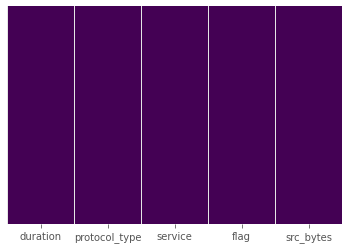

In [5]:
describe.heatmap_mv(df[["duration", "protocol_type", "service", "flag", "src_bytes"]])

In [7]:
describe.profiling(df[["duration", "protocol_type", "service", "flag", "src_bytes"]],"kddcup","result.html")

In [9]:
describe.crosstab(df,"is_guest_login", "protocol_type",'normal')

protocol_type,icmp,tcp,udp,All
is_guest_login,,,,
0,2833545,1866507,194288,4894340
1,0,4091,0,4091
All,2833545,1870598,194288,4898431


In [10]:
describe.crosstab(df,"is_guest_login", "protocol_type",'percent')

protocol_type,icmp,tcp,udp,All
is_guest_login,,,,
0,0.578943,0.381360,0.039696,1.0
1,0.000000,1.000000,0.000000,1.0
All,0.578460,0.381877,0.039663,1.0


In [31]:
describe.pivot(df,val='rerror_rate',col='protocol_type',row="is_guest_login",
               aggfunc=np.mean,fv=0)

,Class icmp,Class tcp,Class udp
is_guest_login,,,
0,0.00%,15.13%,0.00%
1,0.00%,0.11%,0.00%


In [6]:
describe.pivot_table(df[["duration", "protocol_type", "service", "flag", "src_bytes"]],"kddcup.html")

In [12]:
describe.sweetviz(df[["duration", "protocol_type", "service", "flag", "src_bytes",'label']],
                  None,"kddcup.html")


                                   |                         | [  0%]   00:00  -> (? left)
Summarizing dataframe:             |                         | [  0%]   00:00  -> (? left)
Summarizing dataframe:             |███                  | [ 14%]   00:03  -> (00:20 left)
:duration:                         |███                  | [ 14%]   00:03  -> (00:20 left)
:duration:                         |██████               | [ 29%]   01:47  -> (02:47 left)
:protocol_type:                    |██████               | [ 29%]   01:47  -> (02:47 left)
:protocol_type:                    |█████████            | [ 43%]   01:48  -> (01:35 left)
:service:                          |█████████            | [ 43%]   01:48  -> (01:35 left)
:service:                          |████████████         | [ 57%]   01:49  -> (00:51 left)
:flag:                             |████████████         | [ 57%]   01:49  -> (00:51 left)
:flag:                             |███████████████      | [ 71%]   01:50  -> (00:24 left

Creating Associations graph... DONE!
Report kddcup.html.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


Your selected dataframe has 6 columns.
There are 0 columns that have missing values.


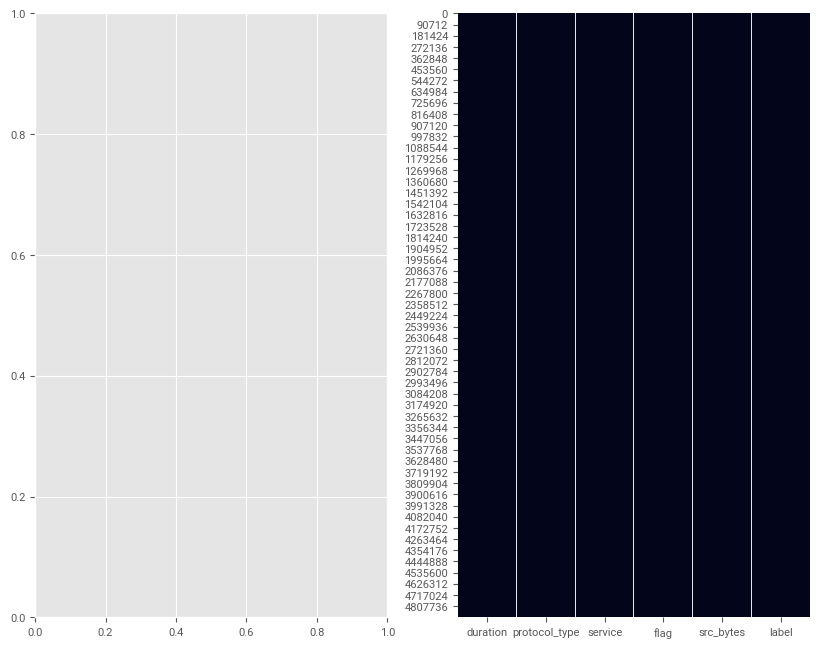

,Missing Values,% of Total Values


In [17]:
describe.missing_values_table(df[["duration", "protocol_type", "service", "flag", "src_bytes",'label']])

In [19]:
describe.pandas_gui(df)

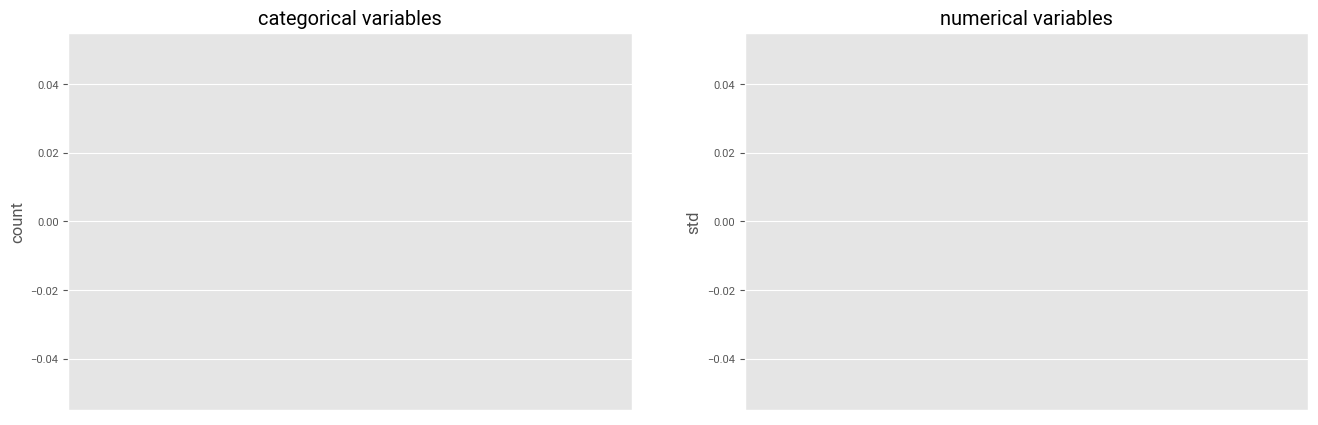

({},
 {},
 duration         0.0
 protocol_type    0.0
 service          0.0
 flag             0.0
 src_bytes        0.0
 label            0.0
 dtype: float64)

In [22]:
describe.fillna_separate_obj(df[["duration", "protocol_type", "service", "flag", "src_bytes",'label']],'unknown','median')

In [ ]:
describe.aggregate(df[["duration", "protocol_type", "service", "flag", "src_bytes",'label']],'label')